In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract as ts
import re
import os
from glob import glob
from tqdm import tqdm

In [2]:
# receipts_paths_full = glob("/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/tesseract/Receipts/*.jpg")
receipts_paths = glob("/home/jayanthikishore/Downloads/test/*.jpg")
receipts_paths

['/home/jayanthikishore/Downloads/test/1035-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1007-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1049-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1008-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1000-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1079-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1091-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1003-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/10033-receipt.jpg',
 '/home/jayanthikishore/Downloads/test/1023-receipt.jpg']

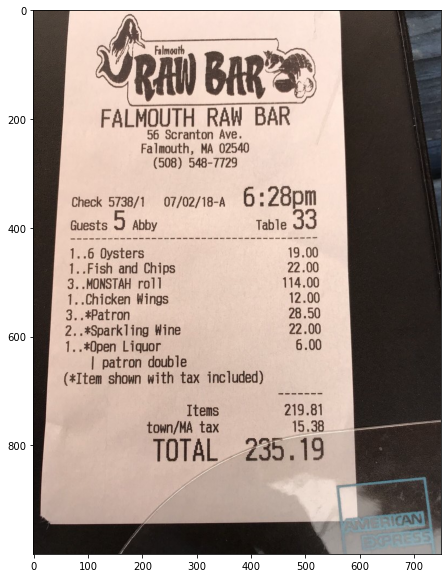

In [3]:
plt.figure(figsize=(12,10))
plt.imshow(cv2.imread(receipts_paths[5]))
plt.show()

In [11]:
for receipt_path in tqdm(receipts_paths):
    receipt = cv2.imread(receipt_path)
    
    #converting image into gray scale image
    gray_image = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)

    # converting it to binary image by Thresholding
    threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    #plt.figure(figsize=(10,10))
    #plt.imshow(threshold_img)
    #plt.show()
    
    #configuring parameters for tesseract
    custom_config = r'--oem 3 --psm 6'

    details = ts.image_to_data(threshold_img, output_type=ts.Output.DICT, config=custom_config,lang='eng')
    #print(details.keys())
    
    #print(ts.image_to_string(threshold_img))
    
    total_boxes = len(details['text'])
    for sequence_number in range(total_boxes):
        if int(details['conf'][sequence_number]) >10:
            (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
            image = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
    #plt.figure(figsize=(10,10))
    #plt.imshow(threshold_img)
    #plt.show()
    
    %run -i 'text_seperate.py'
    text_sep = text_seperate(details)
    print(receipt_path,text_sep[1],len(text_sep))
    
    for i in range(len(text_sep)):
        s1 = text_sep[i]
        s2 = ' '.join([str(x) for x in s1])
        s22 = s2.split(' ')[0]
        if(s22 == 'Total') or (s22 == 'TOTAL'):
            print(s2)

 10%|█         | 1/10 [00:00<00:04,  2.03it/s]

/home/jayanthikishore/Downloads/test/1035-receipt.jpg ['cn', 'Fake', 'ceoeee', 'RR', 'Ra', 'fe', 'Ae', 'weet'] 40


 20%|██        | 2/10 [00:01<00:04,  1.94it/s]

/home/jayanthikishore/Downloads/test/1007-receipt.jpg ['Katana', 'Sushi'] 24
Total $143.71


 30%|███       | 3/10 [00:01<00:03,  2.09it/s]

/home/jayanthikishore/Downloads/test/1049-receipt.jpg ['/', 'Ka', 'Makana', 'Alii'] 21
Total bax: $3.48


 40%|████      | 4/10 [00:01<00:02,  2.23it/s]

/home/jayanthikishore/Downloads/test/1008-receipt.jpg ['|', 'Dona', 'Mercedes', 'Restaurant', 'H'] 20


 50%|█████     | 5/10 [00:02<00:02,  2.30it/s]

/home/jayanthikishore/Downloads/test/1000-receipt.jpg ['ou', '\\'] 17


 60%|██████    | 6/10 [00:02<00:01,  2.36it/s]

/home/jayanthikishore/Downloads/test/1079-receipt.jpg ['oe'] 25
TOTAL 235.19


 70%|███████   | 7/10 [00:03<00:01,  2.42it/s]

/home/jayanthikishore/Downloads/test/1091-receipt.jpg ['eae', 'WAVE', 'AVE.', '#100'] 21


 80%|████████  | 8/10 [00:03<00:00,  2.59it/s]

/home/jayanthikishore/Downloads/test/1003-receipt.jpg ['Server:', 'mn', '™', 'Station:', '1?'] 17


 90%|█████████ | 9/10 [00:03<00:00,  2.82it/s]

/home/jayanthikishore/Downloads/test/10033-receipt.jpg ['10325', 'Hammocks', 'Blvd'] 18


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

/home/jayanthikishore/Downloads/test/1023-receipt.jpg ['Thai', 'Gusto', 'Restaurant'] 23
Total 4 item(s) $27 48
